<h3>Problem Statement: Diabetes Prediction</h3>

Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database

Algorithms used:
1. Support Vector Machine
2. Logistic Regression
3. K Nearest Neighbors

<h3>Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

<h3>Reading Dataset

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
data.shape

(768, 9)

<h3>Checking for Missing Values

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

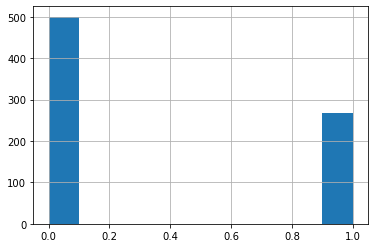

In [8]:
data['Outcome'].hist()

<h3>Splitting into Dependent and Independent Variable

In [9]:
X = data.drop('Outcome', axis = 1)
Y = data['Outcome']

In [10]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

<h3>Standardisation

In [12]:
sc=StandardScaler()
X=sc.fit_transform(X)
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


<h3>Test Train Split

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [14]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


<h3>Logistic Regression Model

In [15]:
def logistic(X_train,Y_train,X_test,Y_test):
    log_model=LogisticRegression()
    log_model.fit(X_train,Y_train)
    y_pred=log_model.predict(X_test)
    print("Accuracy using Logistic Regression:",accuracy_score(Y_test,y_pred))

<h3>K Nearest Neighbors Model

In [16]:
def findK(X_train,Y_train,X_test,Y_test):
    k=[i for i in range(1,31)]
    accuracy=[]
    
    for i in k:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, Y_train)
        y_pred = knn.predict(X_test)
        accuracy.append(accuracy_score(Y_test, y_pred))
        
    plt.xlabel("Value of K")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs K Value")
    plt.plot(k,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    
    max_accuracy=max(accuracy)
    return accuracy.index(max(accuracy))+1

def knn(X_train,Y_train,X_test,Y_test,K):
    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    print("Accuracy using K Nearest Neighbors:",accuracy_score(Y_test, y_pred),"with k=",K)

<h3>Support Vector Machine Model

In [17]:
def SVM(X_train,Y_train,X_test,Y_test):
    #linear kernel
    linearsvm= svm.SVC(kernel='linear')
    linearsvm.fit(X_train,Y_train)
    y_hat_linear=linearsvm.predict(X_test)
    print("Accuracy using linear kernel:",accuracy_score(Y_test, y_hat_linear))
    #poly kernel
    polysvm= svm.SVC(kernel='poly')
    polysvm.fit(X_train,Y_train)
    y_hat_poly=polysvm.predict(X_test)
    print("Accuracy using poly kernel:",accuracy_score(Y_test, y_hat_poly))
    #rbf kernel
    rbfsvm = svm.SVC(kernel='rbf')
    rbfsvm.fit(X_train,Y_train)
    y_hat_rbf=rbfsvm.predict(X_test)
    print("Accuracy using rbf kernel:",accuracy_score(Y_test, y_hat_rbf))

<h3>Finding Accuracies for all Models

Accuracy using Logistic Regression: 0.7727272727272727
Accuracy using K Nearest Neighbors: 0.7922077922077922 with k= 2
Accuracy using linear kernel: 0.7792207792207793
Accuracy using poly kernel: 0.7727272727272727
Accuracy using rbf kernel: 0.7857142857142857


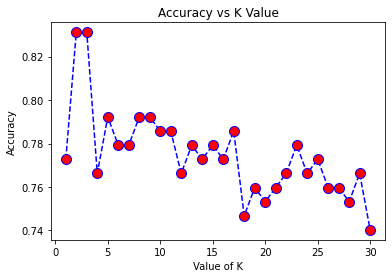

In [18]:
logistic(X_train,Y_train,X_test,Y_test)
knn(X_train,Y_train,X_test,Y_test,findK(X_train,Y_train,X_test,Y_test))
SVM(X_train,Y_train,X_test,Y_test)

<h3>Final Result</h3>
<table>
  <tr>
    <th>Algorithm</th>
    <th></th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td></td>
    <td>0.772</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>linear kernel</td>
    <td>0.779</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>poly kernel</td>
    <td>0.772</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>rbf kernel</td>
    <td>0.785</td>
  </tr>
  <tr>
    <td>KNN</td>
    <td>nearest neighbors=2</td>
    <td>0.792</td>
  </tr>
    
</table> 